In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import astropy.io.fits as fitsio
from astropy.coordinates import SkyCoord
import astropy.units as u

In [6]:
import warnings
warnings.filterwarnings('ignore')

In [7]:
import os
os.environ['KMP_DUPLICATE_LIB_OK'] = 'True'

In [8]:
from importlib import reload
import sys
sys.path.append('/Users/nora/projects/stream_search/code')
import plot_density
reload(plot_density)
import streamlib
reload(streamlib)
import skymap
reload(skymap)
print(skymap.__version__)
import galstreams
reload(galstreams)
from astropy.io import fits as fitsio

0.2.0


## Test Filter

In [54]:
# sgr = fitsio.open('/Users/nora/projects/stream_search/data/Sgr_dsph_PS1.fits.gz')[1].data
leo2 = fitsio.open('/Users/nora/projects/stream_search/data/LeoII_PS1.fits.gz')[1].data

In [55]:
# ra_sgr, dec_sgr = 283.7629167, -30.4783333
ra_leo2, dec_leo2 = 168.3716667, 22.1547222
radius = 0.25

In [58]:
data = leo2
ra, dec = ra_leo2, dec_leo2

In [59]:
import plot_hess
reload(plot_hess)

mu = plot_density.dist2mod(19.999609)
print(mu)

from ugali.utils.projector import angsep
sep = angsep(data['RA'], data['DEC'], ra, dec)
sel_on = sep < radius

sep_off = angsep(data['RA'], data['DEC'], ra, dec+5.0)
sel_off = sep_off < radius

16.505107525619323


In [60]:
import surveys
reload(surveys)
import filter_data
reload(filter_data)

err = surveys.surveys['PS1']['err']
mk = filter_data.mkpol(mu=mu, age=10.5, z=0.001, dmu=0.5, C=[0.05, 0.05], E=1., err=err, survey='PS1')

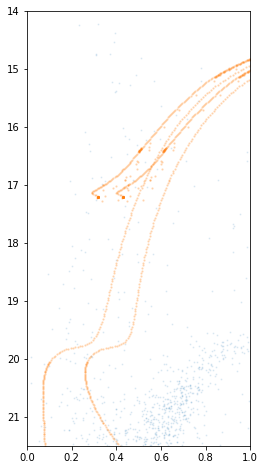

In [62]:
import matplotlib.pyplot as plt

plt.figure(figsize=(4,8))

plt.scatter(data[sel_on]['GFPSFMAG_SFD']-data[sel_on]['RFPSFMAG_SFD'], data[sel_on]['GFPSFMAG_SFD'], s=1, alpha=0.1)
# plt.scatter(sgr[sel_off]['GFPSFMAG_SFD']-sgr[sel_off]['RFPSFMAG_SFD'], sgr[sel_off]['GFPSFMAG_SFD'], s=1, alpha=0.1)
plt.scatter(mk[:,0], mk[:,1]+mu, s=2, alpha=0.2)
plt.xlim(0, 1)
plt.ylim(21.5, 14)

plt.show()

dx, dy =  0.02 0.0833


(<matplotlib.axes._subplots.AxesSubplot at 0x1073a5e50>,
 <matplotlib.image.AxesImage at 0x1207d58d0>)

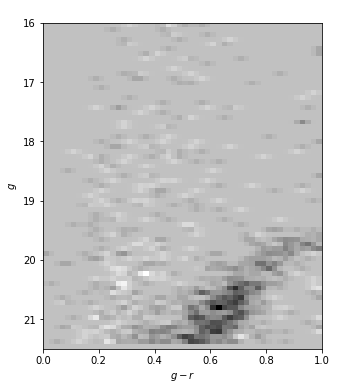

In [65]:
plot_hess.plot_hess( '', data[sel_on], data[sel_off], gband='GFPSFMAG_SFD', rband='RFPSFMAG_SFD', gmax=21.5, dx=0.04/2., dy=0.1666/2., no_bkg=False, smoothing=(.75, .25))

## Spatial Plots

In [9]:
mw_streams = galstreams.MWStreams(verbose=False)

In [10]:
plot_density.plot_pretty(figsize=(18,14))

In [11]:
# def plot_streams(smap, mu, dmu=0.5, coords='cel'):
#     mw_streams = galstreams.MWStreams(verbose=False)
#     for stream in mw_streams.keys():
#         if stream in ['Her-Aq', 'EriPhe', 'Sgr-L10']:
#             continue
#         mu_stream = plot_density.dist2mod(mw_streams[stream].Rhel[0])
#         if np.abs(mu - mu_stream) < dmu:
#             # print stream, mw_streams[stream].ra.max() - mw_streams[stream].ra.min(), mw_streams[stream].dec.max(), mw_streams[stream].dec.min()
#             if coords == 'gal':
#                 x, y = smap(mw_streams[stream].l, mw_streams[stream].b)
#             else:
#                 x, y = smap(mw_streams[stream].ra, mw_streams[stream].dec)
#             smap.plot(x, y, '.', alpha=0.5)
#             plt.gca().annotate(mw_streams[stream].name, (x.min(), y.min()), color='b', fontsize=15)
            
            
# def plot_stream_list(smap, streams, coords='cel'):
#     mw_streams = galstreams.MWStreams(verbose=False)
#     for stream in streams:
#         if coords == 'gal':
#             x, y = smap(mw_streams[stream].l, mw_streams[stream].b)
#         else:
#             x, y = smap(mw_streams[stream].ra, mw_streams[stream].dec)
#         smap.plot(x, y, '.', alpha=0.5)
#         plt.gca().annotate(mw_streams[stream].name, (x.min(), y.min()), color='b', fontsize=15)
            
            
# def plot_ravi_rrl(smap, coords='cel'):
#     filename = '../data/hsoy_css_sss.gal.no_gcdw.t1d.Rg24.5-1.cmb.gc3.footprint.short.dat'
#     stream = np.genfromtxt(filename)
#     if coords == 'gal':
#         x, y = smap(stream['l'], stream['b'])
#     else:
#         x, y = smap(stream['RA'], stream['DEC'])
#     smap.plot(x, y, '.', alpha=0.5)
#     plt.gca().annotat('Ravi_RRL', (x.min(), y.min()), color='b', fontsize=15)
    
    
    

In [29]:
# filename = '/Users/nora/projects/stream_search/data/iso_hpxcube_ps1_v2.fits.gz'
filename = '/Users/nora/projects/stream_search/data/PS1_iso_hpxcube_z0.0010_a12.0.fits.gz'
filename1 = '/Users/nora/projects/stream_search/data/PS1_iso_hpxcube_z0.0010_a12.0_bmin10_bmax20.fits.gz'
filename2 = '/Users/nora/projects/stream_search/data/PS1_iso_hpxcube_z0.0010_a12.0_bmin5_bmax10.fits.gz'
filename3 = '/Users/nora/projects/stream_search/data/PS1_iso_hpxcube_z0.0010_a12.0_bmin0_bmax5.fits.gz'
# hpxcube, fracdet, modulus = plot_density.load_hpxcube(filename)

import load_data
reload(load_data)
hpxcube, fracdet, modulus = load_data.load_data(filename=filename, survey='PS1')
hpxcube1, fracdet1, modulus = load_data.load_data(filename=filename1, survey='PS1')
hpxcube2, fracdet2, modulus = load_data.load_data(filename=filename2, survey='PS1')
hpxcube3, fracdet3, modulus = load_data.load_data(filename=filename3, survey='PS1')

Reading /Users/nora/projects/stream_search/data/PS1_iso_hpxcube_z0.0010_a12.0.fits.gz...
Reading /Users/nora/projects/stream_search/data/PS1_iso_hpxcube_z0.0010_a12.0_bmin10_bmax20.fits.gz...
Reading /Users/nora/projects/stream_search/data/PS1_iso_hpxcube_z0.0010_a12.0_bmin5_bmax10.fits.gz...
Reading /Users/nora/projects/stream_search/data/PS1_iso_hpxcube_z0.0010_a12.0_bmin0_bmax5.fits.gz...


In [20]:
hpxcube[:,0].size
import healpy as hp
hp.nside2npix(512)

3145728

In [21]:
hpxcube.max()

2013.0

In [22]:
fracdet

array([0., 0., 0., ..., 0., 0., 0.])

In [23]:
mw_streams.keys()

dict_keys(['VOD/VSS', 'Monoceros', 'EBS', 'Her-Aq', 'PAndAS', 'Tri-And', 'Tri-And2', 'PiscesOv', 'EriPhe', 'Phoenix', 'WG1', 'WG2', 'WG3', 'WG4', 'Acheron', 'Cocytos', 'Lethe', 'Styx', 'ACS', 'Pal15', 'Eridanus', 'TucanaIII', 'Indus', 'Jhelum', 'Ravi', 'Chenab', 'Elqui', 'Aliqa_Uma', 'Turbio', 'Willka_Yaku', 'Turranburra', 'Wambelong', 'Palca', 'Jet', 'Gaia-1', 'Gaia-2', 'Gaia-3', 'Gaia-4', 'Gaia-5', 'PS1-A', 'PS1-B', 'PS1-C', 'PS1-D', 'PS1-E', 'ATLAS', 'Ophiucus', 'Sangarius', 'Scamander', 'Corvus', '20.0-1', 'Sgr-L10', 'Orphan', 'Pal5', 'GD-1', 'Tri/Pis', 'NGC5466', 'Alpheus', 'Hermus', 'Hyllus', 'Cetus', 'Kwando', 'Molonglo', 'Murrumbidgee', 'Orinoco', 'Phlegethon', 'Slidr', 'Sylgr', 'Ylgr', 'Fimbulthul', 'Svol', 'Fjorm', 'Gjoll', 'Leiptr'])

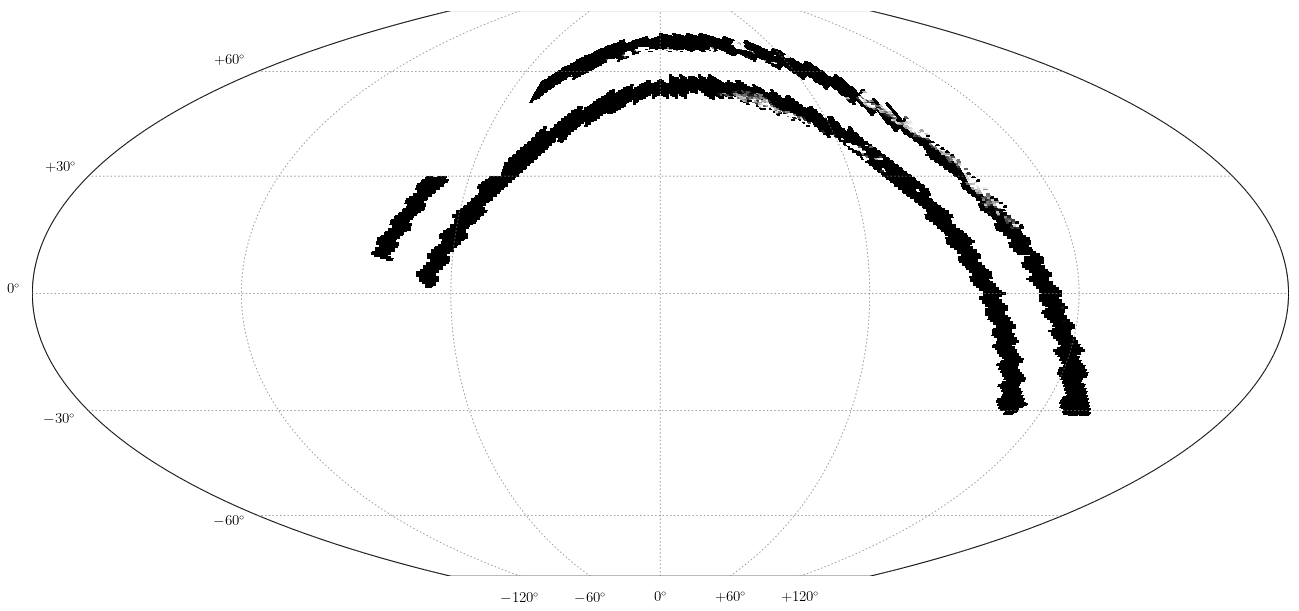

In [24]:
mu = 16.0
data = plot_density.prepare_hpxmap(mu, hpxcube, fracdet, modulus, clip=100, plane=False, center=True, sgr=False, bmax=25, cmax=40)
bkg = 0
# data, bkg = plot_density.prepare_hpxmap(mu, hpxcube, fracdet, modulus, clip=100, plane=True, center=True, sgr=False, bmax=25, cmax=40)
smap = plot_density.plot_density(data, bkg, center=(0,30), vmax=13)

# x, y = smap(mw_streams['ATLAS'].ra, mw_streams['ATLAS'].dec)
# smap.plot(x, y, alpha=1.0, c='r')
# plot_streams(smap, mu)
# mw_streams.plot_stream_compilation(plt.gca())

# plot_density.plot_stream_list(smap, ['Sgr-L10'])



In [48]:
np.sum((hpxcube2 > 0) & (hpxcube3 > 0)), hpxcube.size

(0, 163577856)

(array([[False, False, False, ..., False, False,  True],
        [False, False, False, ..., False,  True,  True],
        [False, False, False, ..., False, False,  True],
        ...,
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True]]),
 array([[ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        ...,
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True]]))

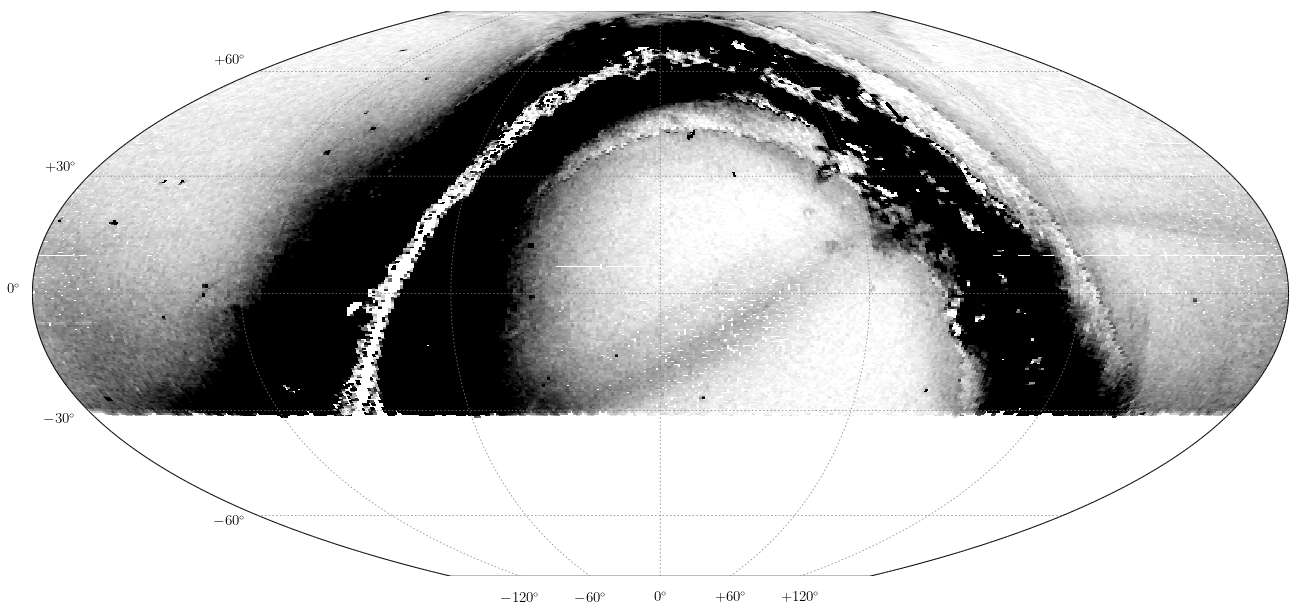

In [39]:
reload(plot_density)

mu = 16.0
# data = plot_density.prepare_hpxmap(mu, hpxcube, fracdet, modulus, clip=100, plane=False, center=False, sgr=False, masking=False, bmax=25, cmax=40)
# data1 = plot_density.prepare_hpxmap(mu, hpxcube1, fracdet1, modulus, clip=100, plane=False, center=False, sgr=False, masking=False, bmax=25, cmax=40)
# data2 = plot_density.prepare_hpxmap(mu, hpxcube2, fracdet2, modulus, clip=100, plane=False, center=False, sgr=False, masking=False, bmax=25, cmax=40)
# data3 = plot_density.prepare_hpxmap(mu, hpxcube3, fracdet3, modulus, clip=100, plane=False, center=False, sgr=False, masking=False, bmax=25, cmax=40)
bkg = 0

smap = plot_density.plot_density(data, bkg, center=(0,30), vmax=13)
smap = plot_density.plot_density(data1, bkg, center=(0,30), vmax=13, smap=smap)
smap = plot_density.plot_density(data2, bkg, center=(0,30), vmax=13, smap=smap)
smap = plot_density.plot_density(data3, bkg, center=(0,30), vmax=13, smap=smap)



In [ ]:
for stream in ['ATLAS', 'Molonglo', 'Murrumbidgee', 'Orinoco', 'Kwando']:
    mu = plot_density.dist2mod(mw_streams[stream].Rhel[0])
    print(stream, mu)

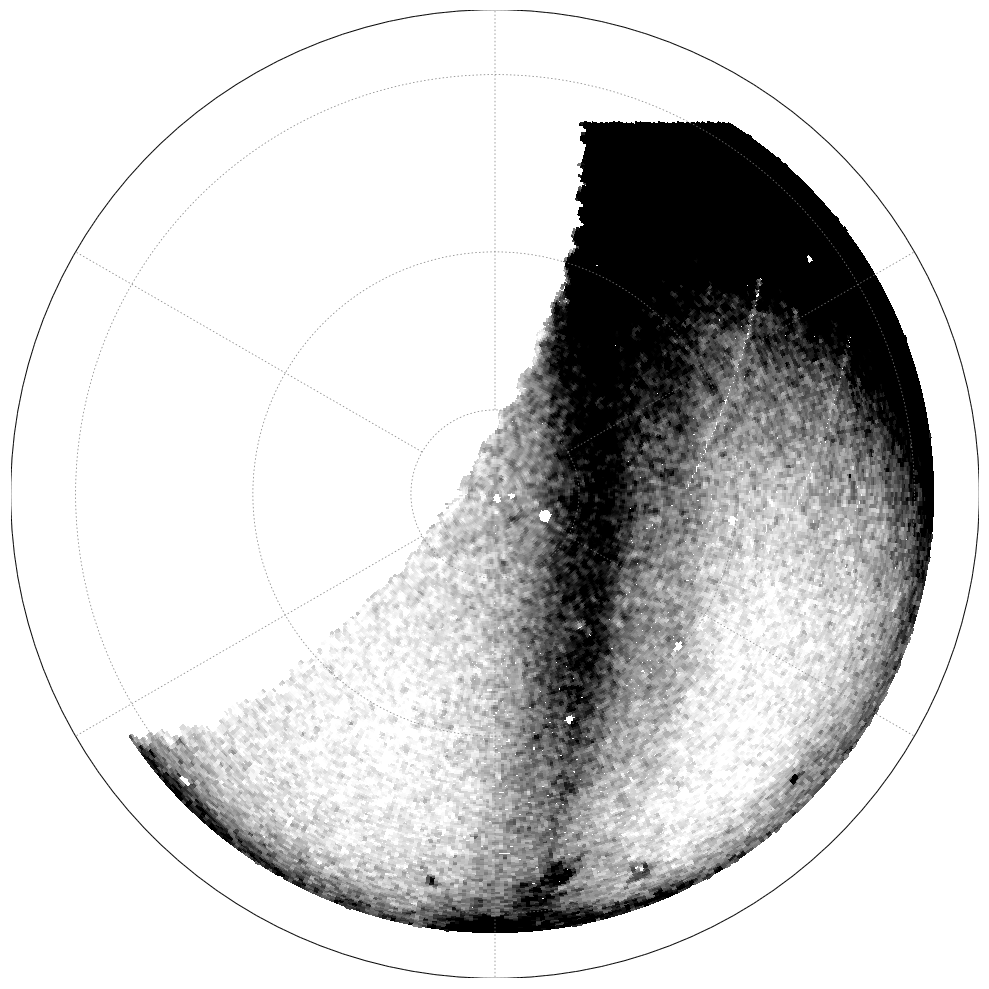

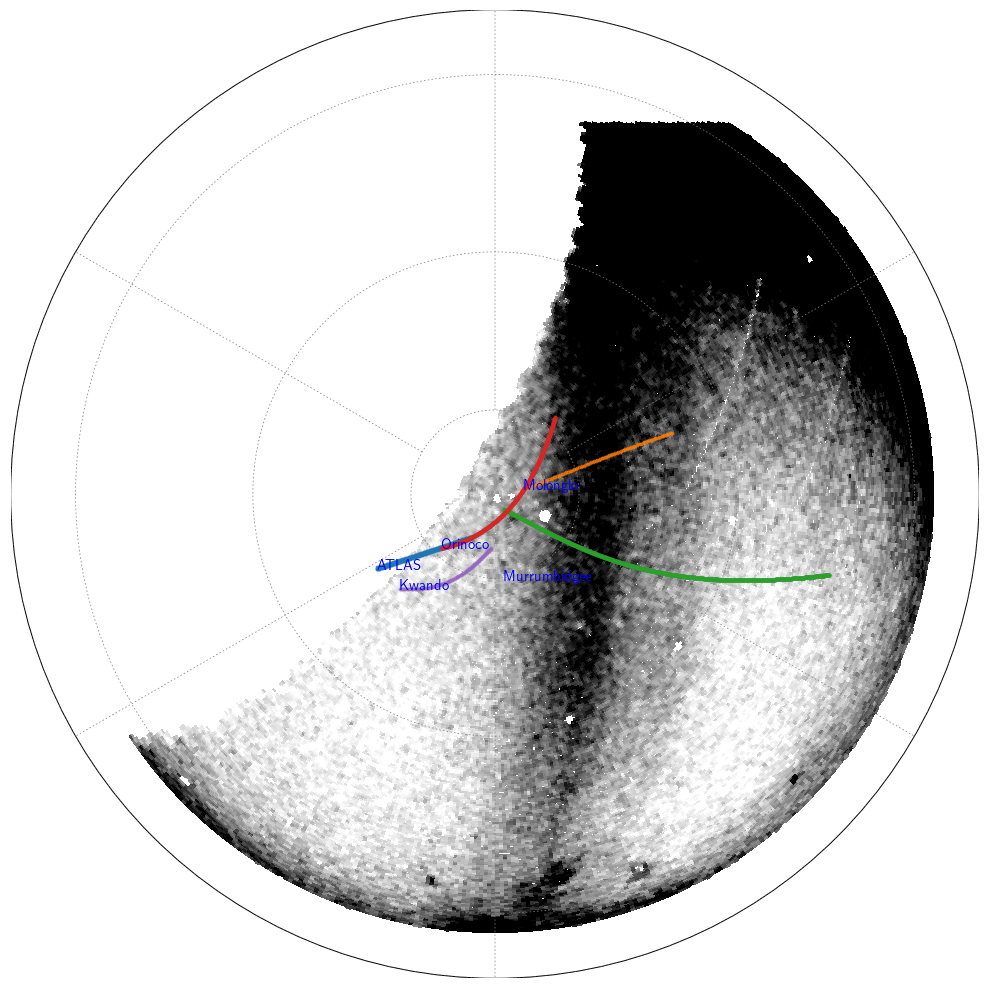

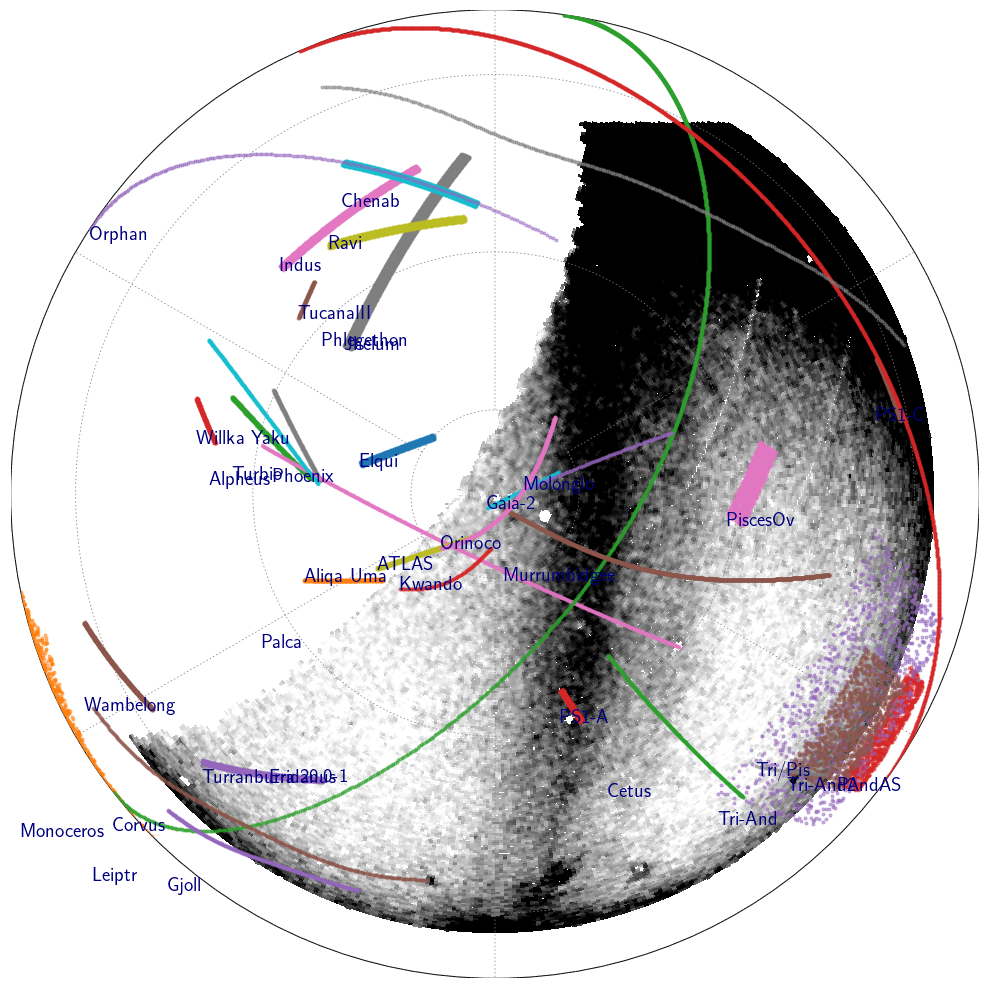

In [22]:
mu = 17
coords='gal'
lon, lat = 0, -90

# data = plot_density.prepare_hpxmap(mu, hpxcube, fracdet, modulus, clip=100, plane=True, center=True, sgr=False, bmax=25, cmax=40)
# bkg = plot_density.fit_background(data, center=center, coords='cel', sigma=0.2, deg=5)
smap = plot_density.plot_density(data, 0, center=(lon,lat), vmax=6, coords=coords, proj='ortho', xsize=600, smooth=0.2)
# plot_density.plot_streams(smap, mu, 10.0, coords=coords)
# plot_ravi_rrl(smap)
# plt.savefig('../plots/galactic_cap/galactic_cap_%.2f.png' %mu)

smap = plot_density.plot_density(data, 0, center=(lon, lat), vmax=6, coords='gal', proj='ortho', xsize=600)
plot_density.plot_stream_list(smap, ['ATLAS', 'Molonglo', 'Murrumbidgee', 'Orinoco', 'Kwando'], coords='gal')
# plt.savefig('../plots/galactic_cap/labeled/ps1_%s_%i_%i_%.2f_labeled.png' %(coords, lon, lat, mu))

smap = plot_density.plot_density(data, 0, center=(lon, lat), vmax=6, coords='gal', proj='ortho', xsize=600)
plot_density.plot_streams(smap, mu, 50, coords='gal') # filename='../plots/ps1/cap_all_labels.png'


In [24]:
mw_streams = galstreams.MWStreams(verbose=False)
center_ophi = (mw_streams['Ophiucus'].ra.mean(), mw_streams['Ophiucus'].dec.mean())
mu_ophi = plot_density.dist2mod(mw_streams['Ophiucus'].Rhel[0])
print(center_ophi, mu_ophi)
print(mw_streams['Ophiucus'].b.mean())

(241.77377448571215, -6.950210590135598) 14.888618026444238
31.69402457397246


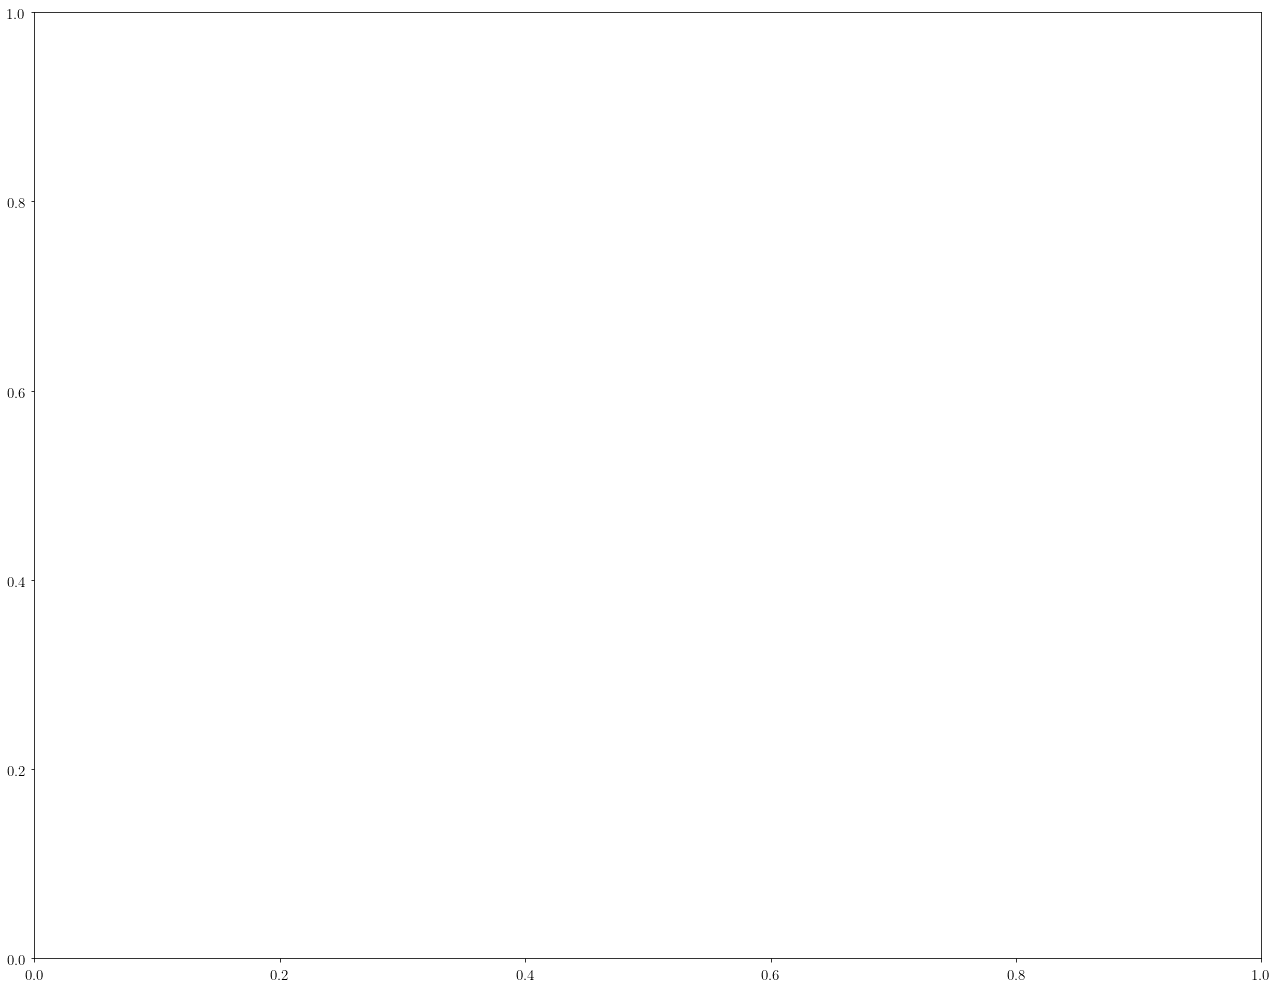

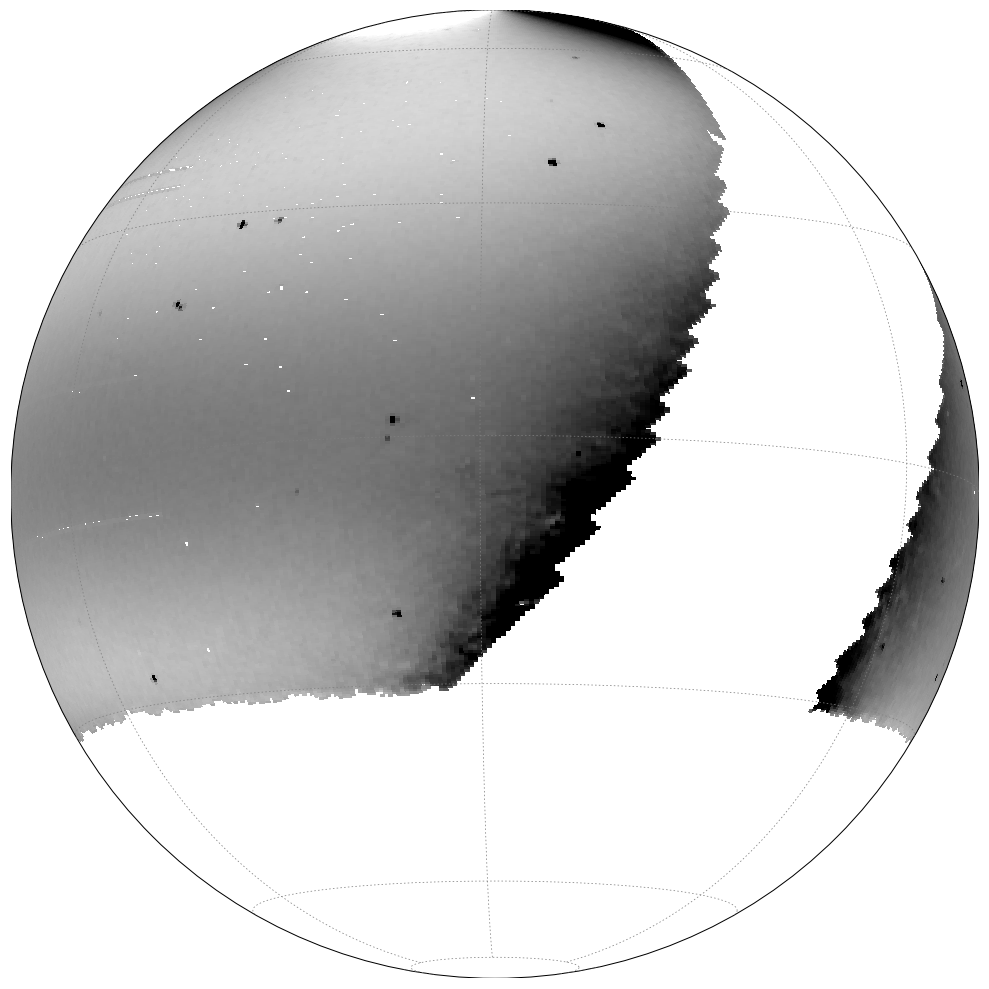

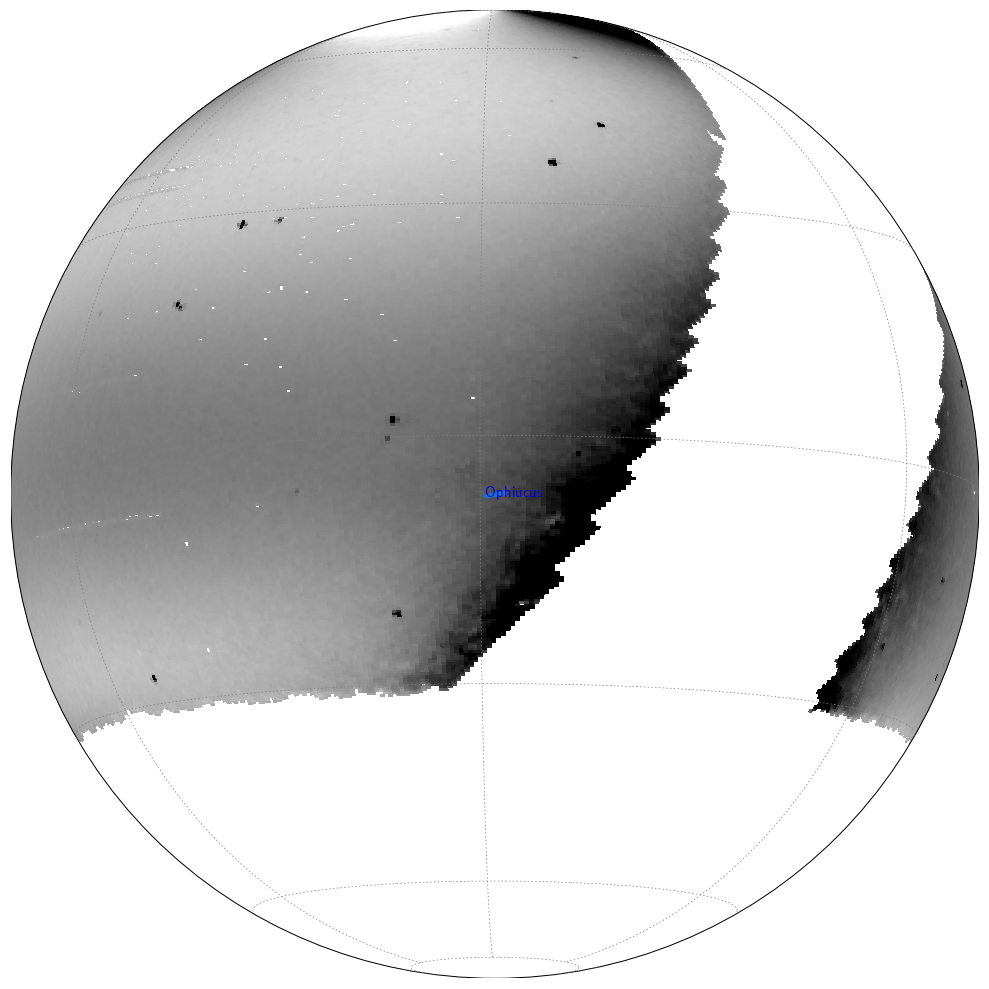

In [29]:
# mu = mu_ophi

data_ophi = plot_density.prepare_hpxmap(mu_ophi, hpxcube, fracdet, modulus, clip=100, plane=False, center=False, sgr=False, bmax=25, cmax=40)
bkg_ophi = plot_density.fit_background(data_ophi, center=center_ophi, coords='cel', sigma=0.2, deg=5)
smap = plot_density.plot_density(data_ophi, bkg_ophi, center=center_ophi, vmax=50, coords='cel', proj='ortho', xsize=600)
plt.savefig('../plots/ophiucus.png')
smap = plot_density.plot_density(data_ophi, bkg_ophi, center=center_ophi, vmax=50, coords='cel', proj='ortho', xsize=600)
plot_density.plot_stream_list(smap, ['Ophiucus'])
plt.savefig('../plots/ophiucus_labeled.png')


In [31]:
stream = 'Lethe'
mu = plot_density.dist2mod(mw_streams[stream].Rhel[0])
print(mu)

15.569716761534185


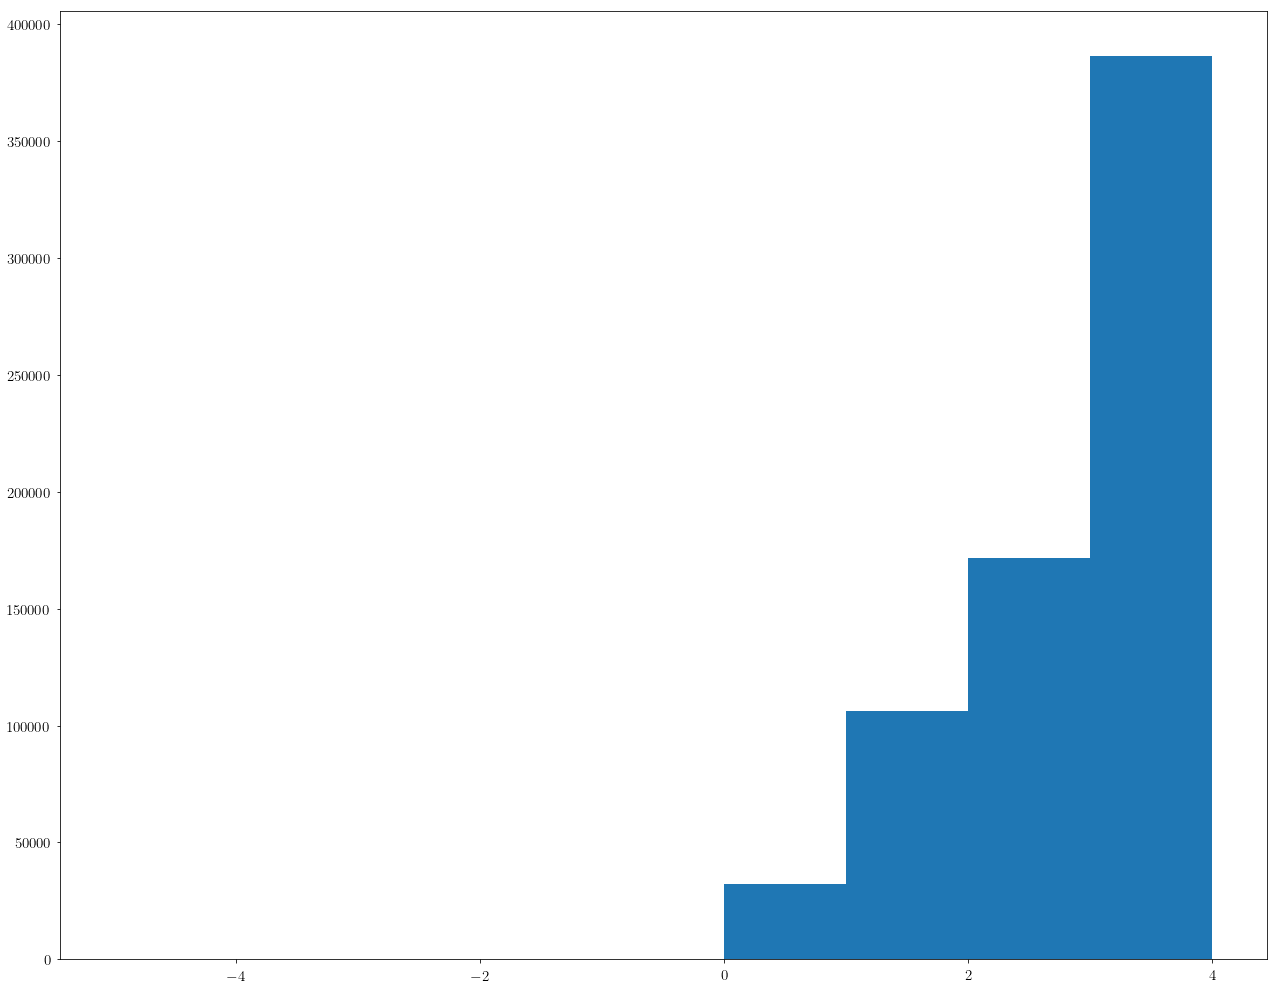

In [32]:
plt.figure()
plt.hist((data-bkg)[~data.mask], bins=np.arange(-5,5))
plt.show()

(-115.74099999999999, 27.5)
16.33585864201507


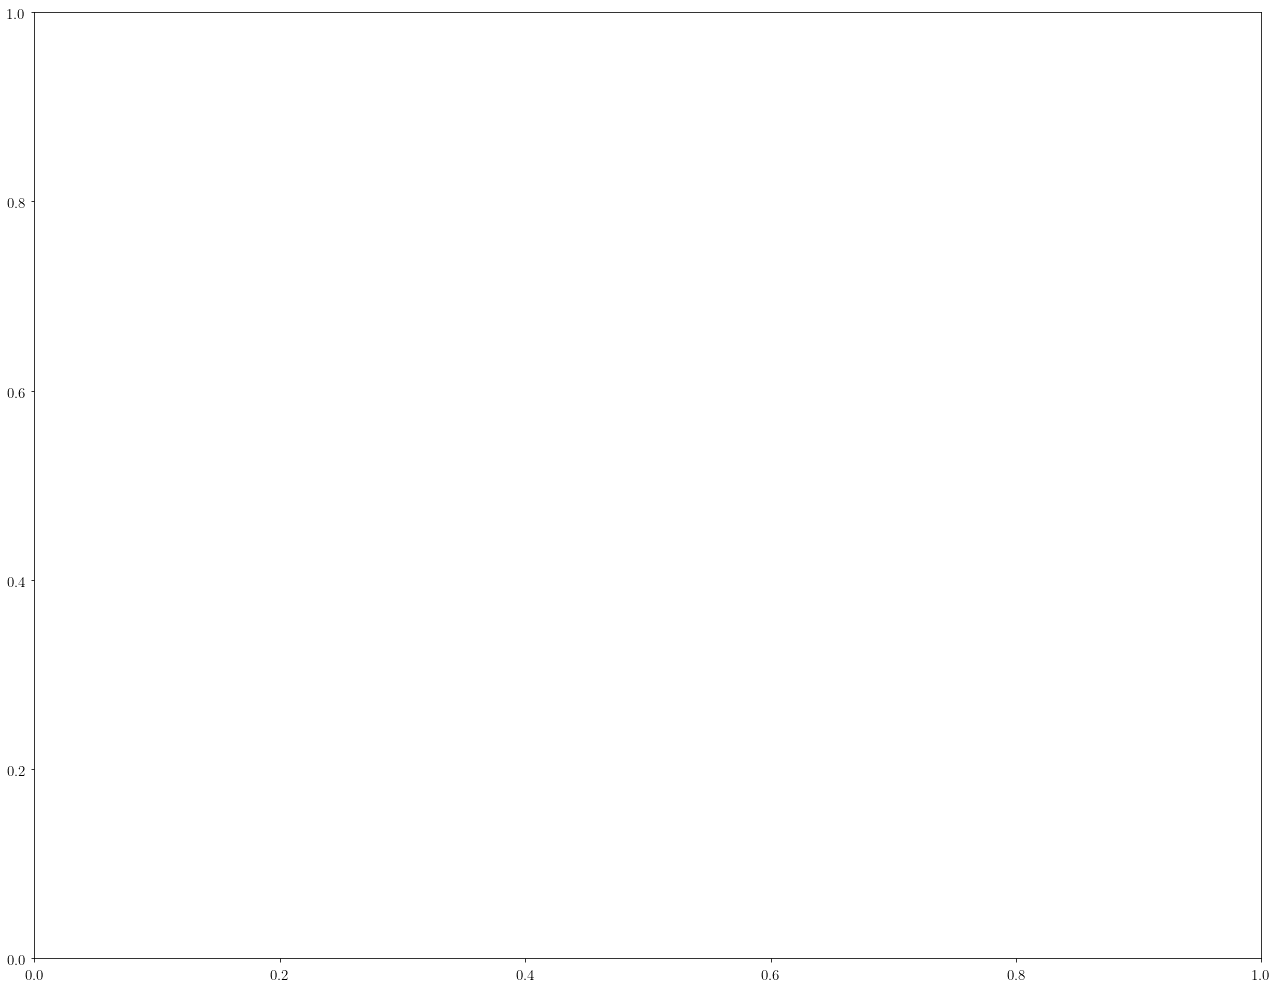

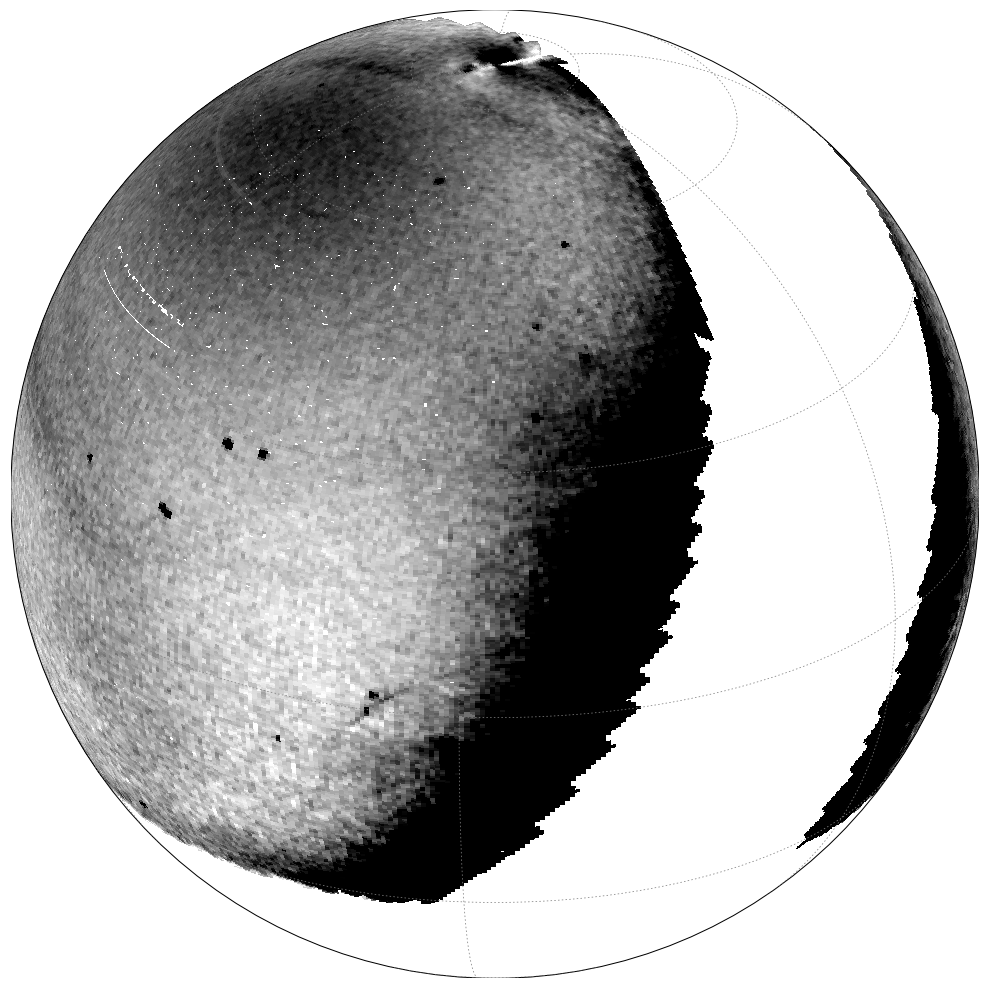

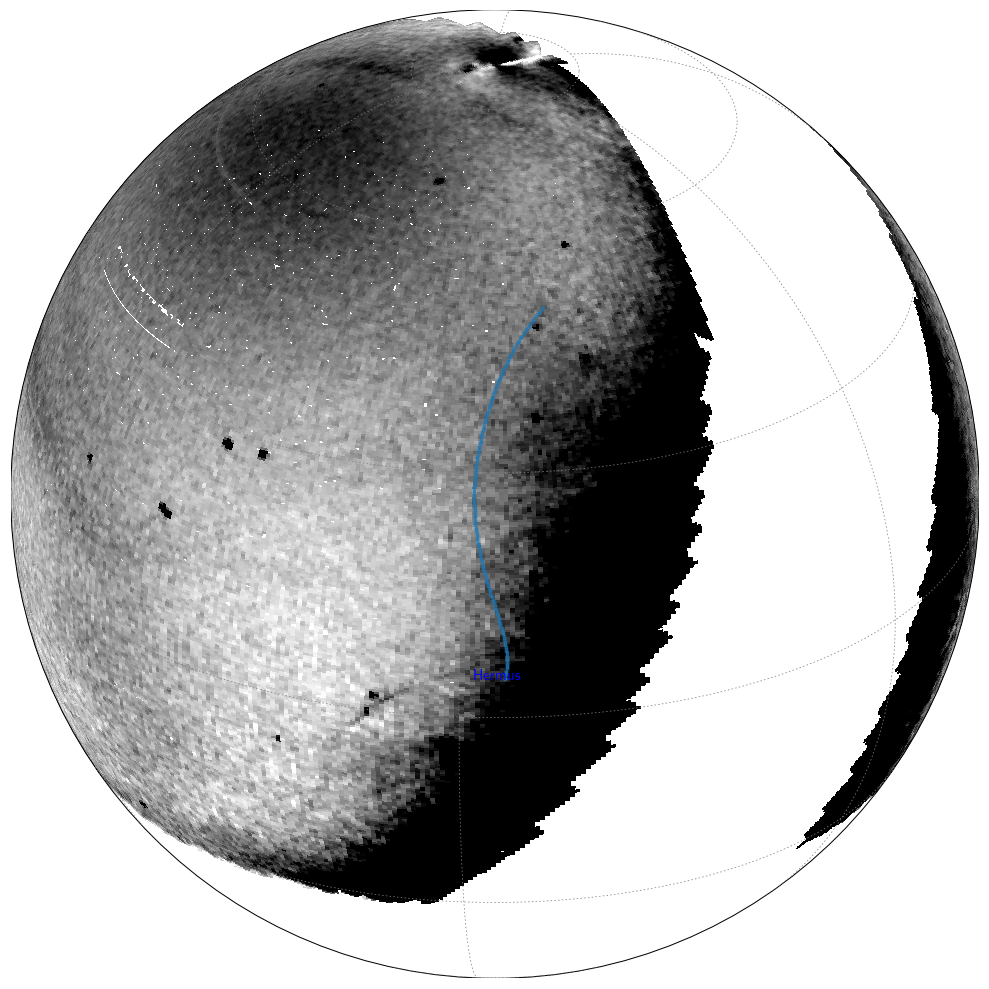

In [33]:
reload(plot_density)
reload(streamlib)

stream = 'Hermus'

# mw_streams = galstreams.MWStreams(verbose=False)
center = (mw_streams[stream].ra.mean(), mw_streams[stream].dec.mean())
if center[0] > 180:
    center = (center[0] - 360, center[1])
print(center)
mu = plot_density.dist2mod(mw_streams[stream].Rhel[0])
print(mu)

vmin = -4
vmax = 2

data = plot_density.prepare_hpxmap(mu, hpxcube, fracdet, modulus, clip=100, plane=False, center=False, sgr=False, bmax=25, cmax=40)
bkg = plot_density.fit_background(data, center=center, coords='cel', sigma=0.2, deg=5)
smap = plot_density.plot_density(data, bkg, center=center, vmin=vmin, vmax=vmax, coords='cel', proj='ortho', xsize=600)
# smap = plot_density.plot_density(data, 0, center=center, vmax=10, coords='cel', proj='ortho', xsize=600)

smap = plot_density.plot_density(data, bkg, center=center, vmin=vmin, vmax=vmax, coords='cel', proj='ortho', xsize=600)
plot_density.plot_stream_list(smap, [stream])


(-145.66938834801826, 23.159301866662204)
15.569716761534185


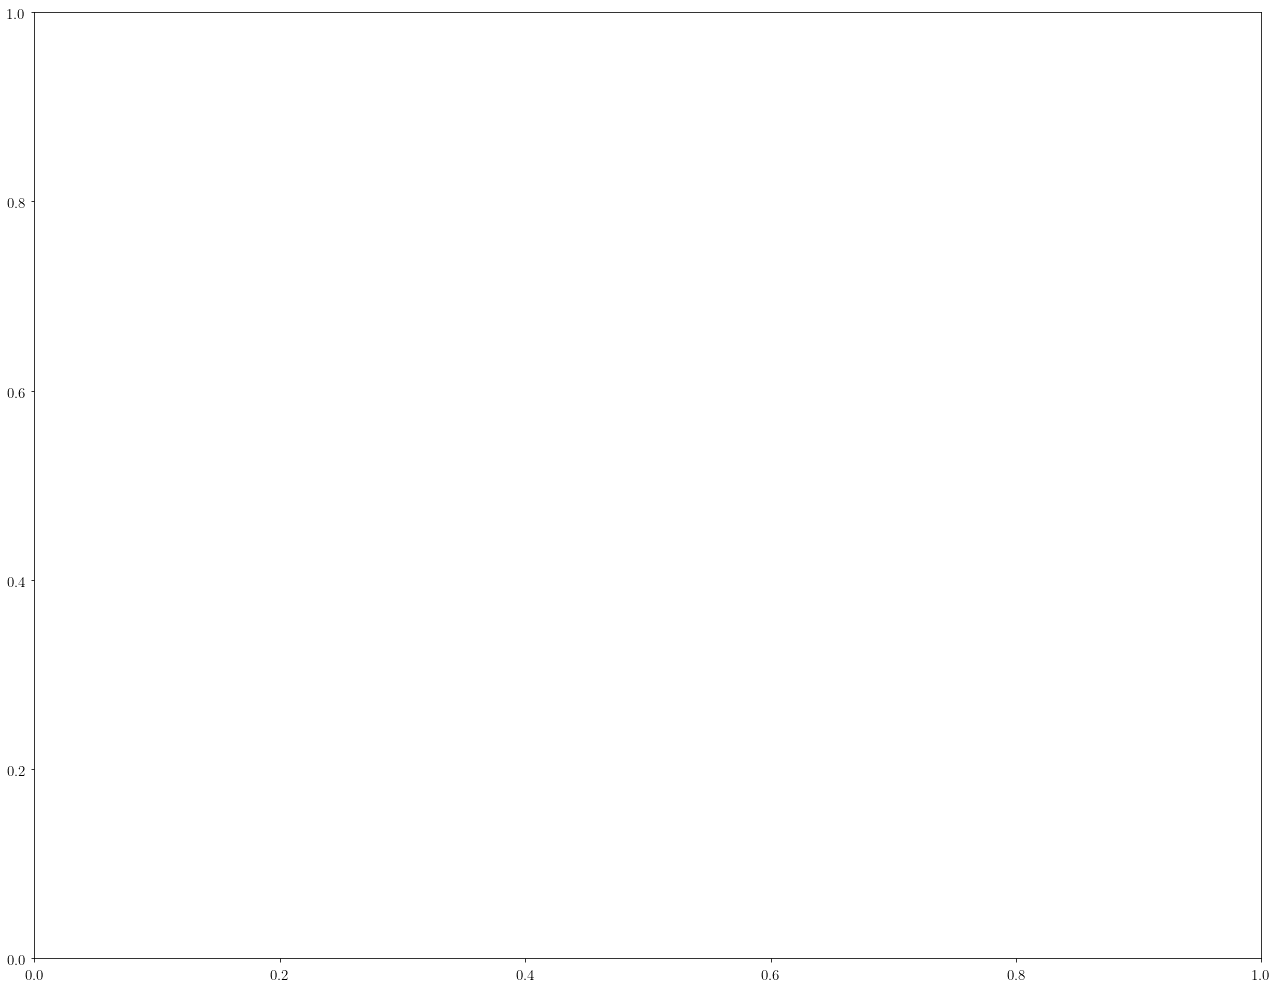

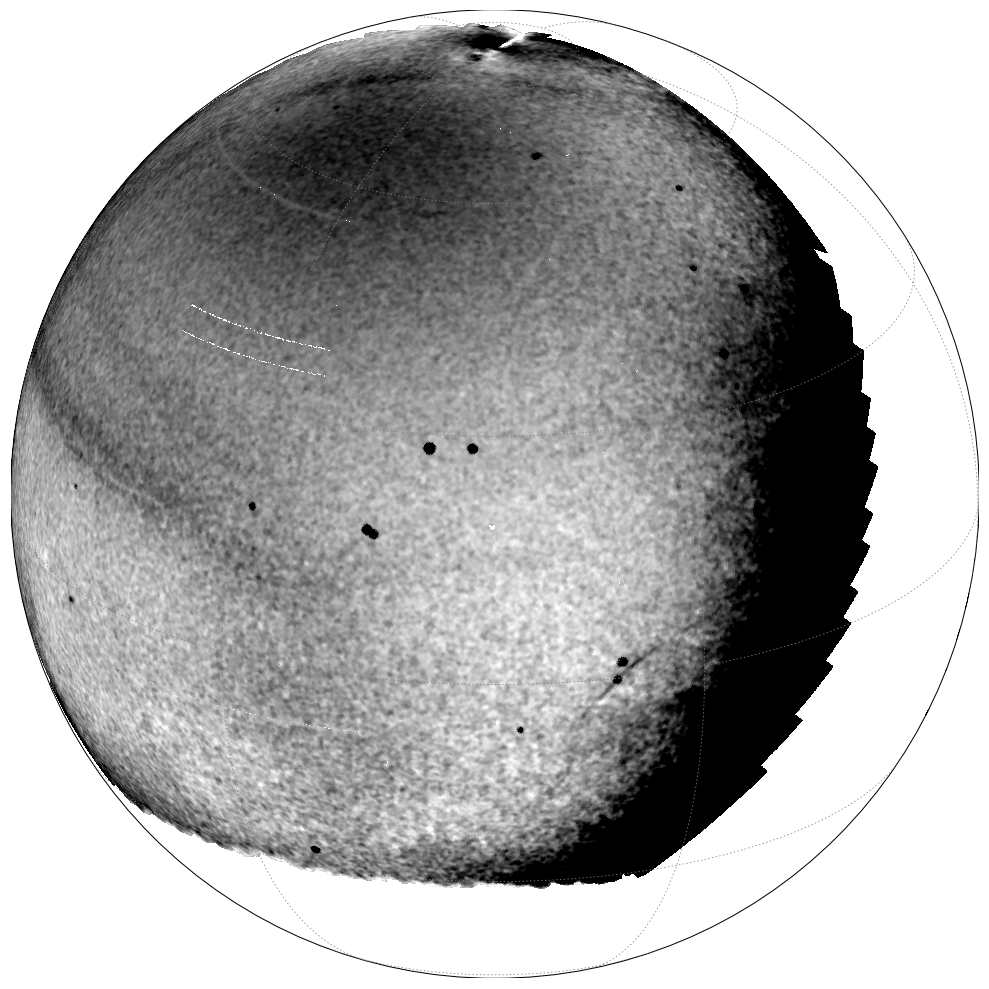

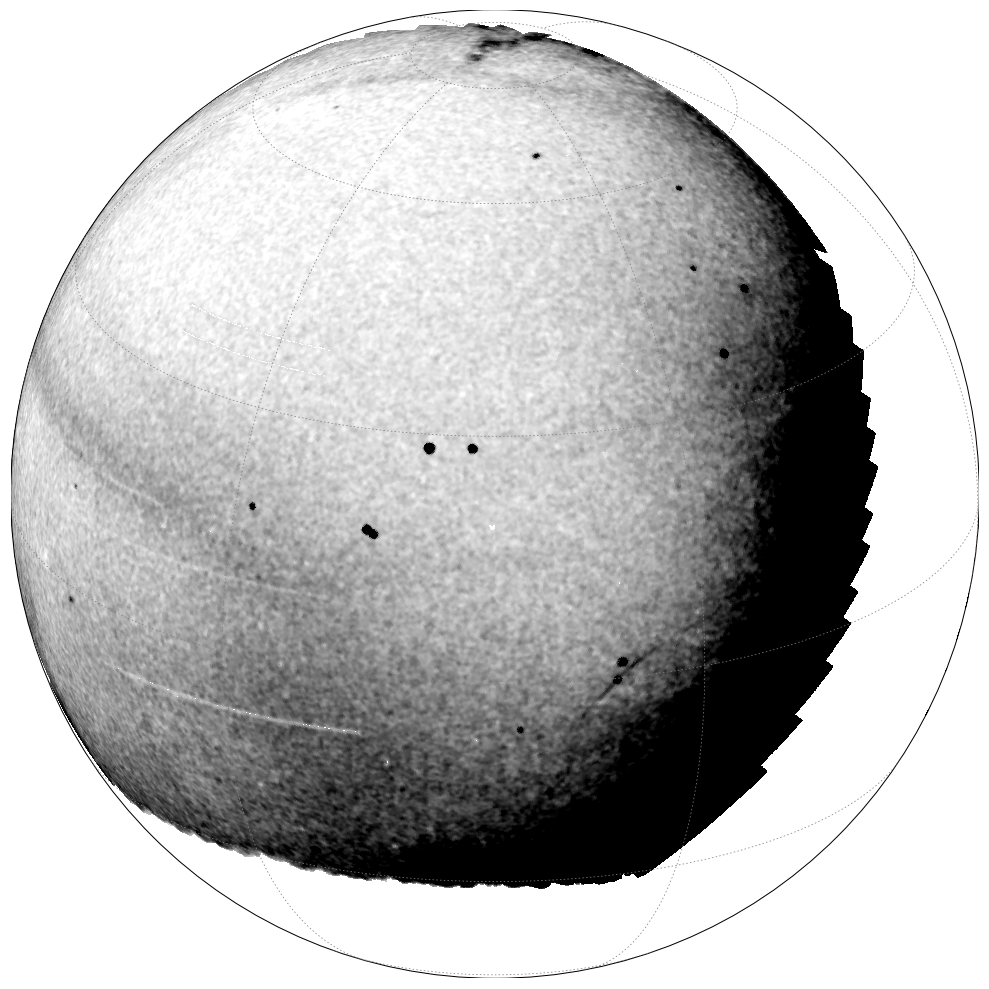

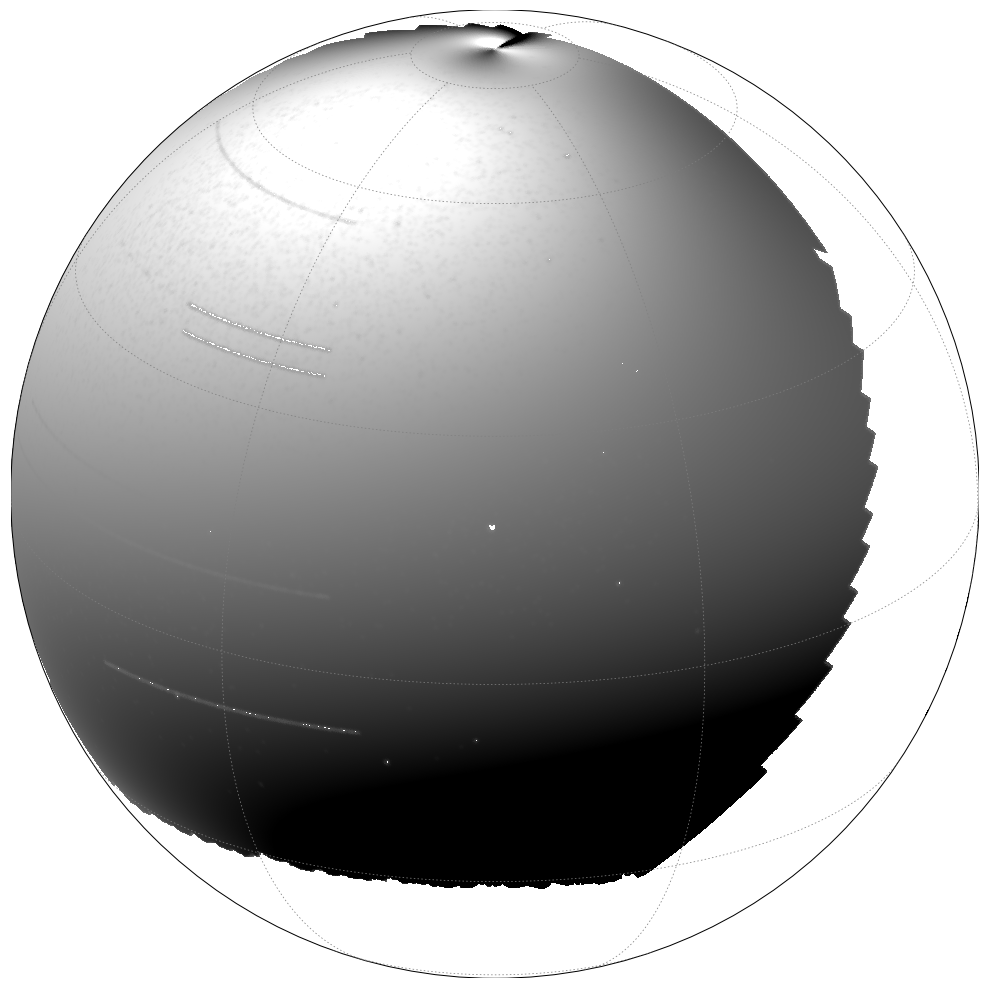

In [44]:
reload(plot_density)
reload(streamlib)

stream = 'Lethe'

# mw_streams = galstreams.MWStreams(verbose=False)
center = (mw_streams[stream].ra.mean(), mw_streams[stream].dec.mean())
if center[0] > 180:
    center = (center[0] - 360, center[1])
print(center)
mu = plot_density.dist2mod(mw_streams[stream].Rhel[0])
print(mu)

vmin = -4
vmax = 2
xsize = 3000
sigma = 0.3

# data = plot_density.prepare_hpxmap(mu, hpxcube, fracdet, modulus, clip=100, plane=False, center=False, sgr=False, bmax=25, cmax=40)
bkg = plot_density.fit_background(data, center=center, coords='cel', sigma=sigma, deg=5)
smap = plot_density.plot_density(data, bkg, center=center, vmin=vmin, vmax=vmax, coords='cel', proj='ortho', xsize=xsize)
smap = plot_density.plot_density(data, 0, center=center, vmax=10, coords='cel', proj='ortho', xsize=xsize)
smap = plot_density.plot_density(bkg, 0, center=center, vmax=10, coords='cel', proj='ortho', xsize=xsize)

# smap = plot_density.plot_density(data, bkg, center=center, vmin=vmin, vmax=vmax, coords='cel', proj='ortho', xsize=xsize)
# plot_density.plot_stream_list(smap, [stream])


In [36]:
stream = 'GD-1'

# mw_streams = galstreams.MWStreams(verbose=False)
center = (mw_streams[stream].ra.mean(), mw_streams[stream].dec.mean())
mu = plot_density.dist2mod(mw_streams[stream].Rhel[0])

data, bkg = plot_density.prepare_hpxmap(mu, hpxcube, fracdet, modulus, clip=100, plane=False, center=False, sgr=False, bmax=25, cmax=40)
smap = plot_density.plot_density(data, bkg, center=center, vmax=8, coords='cel', proj='ortho', xsize=600)

smap = plot_density.plot_density(data, bkg, center=center, vmax=8, coords='cel', proj='ortho', xsize=600)
plot_density.plot_stream_list(smap, [stream])


ValueError: too many values to unpack (expected 2)

In [ ]:
reload(plot_density)
# smap = plot_density.plot_density(data, bkg, center=center, vmax=10, coords='cel', proj='ortho', xsize=600)
# plot_density.plot_streams(smap, mu, 50)
plot_density.plot_stream('Lethe', hpxcube, fracdet, modulus)
plt.savefig('../plots/ps1/v2/lethe/lethe_all_labels.png')

In [ ]:
stream = 'Hermus'
vmax = 10

# mw_streams = galstreams.MWStreams(verbose=False)
center = (mw_streams[stream].ra.mean(), mw_streams[stream].dec.mean())
mu = plot_density.dist2mod(mw_streams[stream].Rhel[0])

data, bkg = plot_density.prepare_hpxmap(mu, hpxcube, fracdet, modulus, clip=100, plane=False, center=False, sgr=False, bmax=25, cmax=40)
smap = plot_density.plot_density(data, bkg, center=center, vmax=vmax, coords='cel', proj='ortho', xsize=600)

smap = plot_density.plot_density(data, bkg, center=center, vmax=vmax, coords='cel', proj='ortho', xsize=600)
plot_density.plot_stream_list(smap, [stream])

smap = plot_density.plot_density(data, bkg, center=center, vmax=vmax, coords='cel', proj='ortho', xsize=600)
plot_density.plot_streams(smap, mu, 50)


In [ ]:
stream = 'Scamander'

# mw_streams = galstreams.MWStreams(verbose=False)
center = (mw_streams[stream].ra.mean(), mw_streams[stream].dec.mean())
mu = plot_density.dist2mod(mw_streams[stream].Rhel[0])

data, bkg = plot_density.prepare_hpxmap(mu, hpxcube, fracdet, modulus, clip=100, plane=False, center=False, sgr=False, bmax=25, cmax=40)
smap = plot_density.plot_density(data, bkg, center=center, vmax=8, coords='cel', proj='ortho', xsize=600)

smap = plot_density.plot_density(data, bkg, center=center, vmax=8, coords='cel', proj='ortho', xsize=600)
plot_density.plot_stream_list(smap, [stream])

smap = plot_density.plot_density(data, bkg, center=center, vmax=8, coords='cel', proj='ortho', xsize=600)
plot_density.plot_streams(smap, mu, 50)


In [ ]:
stream = 'Corvus'

# mw_streams = galstreams.MWStreams(verbose=False)
# center = (mw_streams[stream].ra.mean(), mw_streams[stream].dec.mean())
center = (188.4, -16.7)
mu = plot_density.dist2mod(mw_streams[stream].Rhel[0])
prin(center, mu)

vmax=12

# data, bkg = plot_density.prepare_hpxmap(mu, hpxcube, fracdet, modulus, clip=100, plane=False, center=False, sgr=False, bmax=25, cmax=40)
bkg = 0
smap = plot_density.plot_density(data, bkg, center=center, vmax=vmax, coords='cel', proj='ortho', xsize=600)

smap = plot_density.plot_density(data, bkg, center=center, vmax=vmax, coords='cel', proj='ortho', xsize=600)
plot_density.plot_stream_list(smap, [stream])

smap = plot_density.plot_density(data, bkg, center=center, vmax=vmax, coords='cel', proj='ortho', xsize=600)
plot_density.plot_streams(smap, mu, 50)


In [ ]:
# mu = 17
# coords='gal'
# lon, lat = 0, -90

# data, bkg = plot_density.prepare_hpxmap(mu, hpxcube, fracdet, modulus, clip=100, plane=True, center=True, sgr=False, bmax=25, cmax=40)
# smap = plot_density.plot_density(data, bkg, center=(lon,lat), vmax=6, coords=coords, proj='ortho', xsize=600, smooth=0.2)

In [ ]:
plt.figure()
plt.hist(data, histtype='step', bins=np.arange(1,100,1))
plt.hist(data.compressed(), histtype='step', bins=np.arange(1,100,1))
plt.hist(bkg, histtype='step', bins=np.arange(1,100,1))
plt.show()

In [ ]:
# data = streamlib.prepare_data(hpxcube[:,10], fracdet, fracmin=0.5, clip=100)

# # plt.figure()

# import healpy as hp
# nside = hp.get_nside(data.mask)
# lon, lat = hp.pix2ang(nside, np.arange(hp.nside2npix(nside)), lonlat=True)

# percent = [2,95]
# vmin, vmax = np.percentile(data.compressed(), q=percent)
# print vmin, vmax

# # plt.hist(data, bins=50)

# sigma = 0.2
# data = np.clip(data, vmin, vmax)
# data.fill_value = np.ma.median(data)
# data = np.ma.array(hp.smoothing(data, sigma=np.radians(sigma), verbose=False),
#                    mask=data.mask)

# # plt.hist(data, bins=50)

# smap = skymap.core.McBrydeSkymap(parallels=False, meridians=False)

# sel = ~data.mask
# x, y = smap(lon[sel], lat[sel])
# v = data[sel]

# from polyfit2d import polyfit2d
# deg = 5
# c = polyfit2d(x, y, v, [deg, deg])

# # Evaluate the polynomial
# from numpy.polynomial import polynomial
# x, y = smap(lon, lat)
# bkg = polynomial.polyval2d(x, y, c)
# bkg = np.ma.array(bkg, mask=data.mask, fill_value=np.nan)

# # plt.hist(bkg, bins=50)

# # plt.hist(data-bkg, bins=50)

# # plt.show()


In [ ]:
plt.figure()
smap = skymap.Skymap(projection='ortho', lon_0=0, lat_0=0, celestial=False)
smap.draw_hpxmap(data, cmap='binary')

plt.figure()
smap = skymap.Skymap(projection='ortho', lon_0=0, lat_0=0, celestial=False)
smap.draw_hpxmap(data-bkg, cmap='binary')

plt.figure()
smap = skymap.Skymap(projection='ortho', lon_0=0, lat_0=0, celestial=False)
smap.draw_hpxmap(bkg, cmap='binary')

plt.show()

In [ ]:
reload(plot_density)
# data = plot_density.prepare_hpxmap(mu, hpxcube, fracdet, modulus, clip=100, plane=False, center=False, sgr=False, bmax=25, cmax=40)
bkg = plot_density.fit_background(data, center=(30,0), coords='gal')

from skymap.utils import cel2gal, gal2cel
galpix = hp.ang2pix(nside, *gal2cel(lon, lat), lonlat=True)

plt.figure()
smap = skymap.Skymap(projection='ortho', lon_0=30, lat_0=0, celestial=False)
smap.draw_hpxmap((data-bkg)[galpix], cmap='binary', smooth=0.2)

plt.figure()
smap = skymap.Skymap(projection='ortho', lon_0=30, lat_0=0, celestial=False)
smap.draw_hpxmap(data[galpix], cmap='binary', smooth=0.2)

plt.figure()
smap = skymap.Skymap(projection='ortho', lon_0=30, lat_0=0, celestial=False)
smap.draw_hpxmap(bkg[galpix], cmap='binary', smooth=0.2)

plt.show()

In [ ]:
stream = 'PS1-C'

# mw_streams = galstreams.MWStreams(verbose=False)
center = (mw_streams[stream].ra.mean(), mw_streams[stream].dec.mean())
# center = (296+30, -30+30)
mu = plot_density.dist2mod(mw_streams[stream].Rhel[0])
print(center, mu)

vmax=12

# data, bkg = plot_density.prepare_hpxmap(mu, hpxcube, fracdet, modulus, clip=100, plane=False, center=False, sgr=False, bmax=25, cmax=40)
bkg = 0
smap = plot_density.plot_density(data, bkg, center=center, vmax=vmax, coords='cel', proj='ortho', xsize=600)

smap = plot_density.plot_density(data, bkg, center=center, vmax=vmax, coords='cel', proj='ortho', xsize=600)
plot_density.plot_stream_list(smap, [stream])

smap = plot_density.plot_density(data, bkg, center=center, vmax=vmax, coords='cel', proj='ortho', xsize=600)
plot_density.plot_streams(smap, mu, 50)

x = np.arange(0, 370, 10)
y = np.full_like(x, -15)
x, y = smap(x, y)
smap.plot(x, y, 'r.', ms=20)